In [1]:
import mdtraj as md

traj = md.load('butane_sim.dcd', top='butane.pdb')

In [2]:
import nglview as ngl

visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=199999)

In [3]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [5]:
phi_indices = [0, 4, 7, 10] # atoms for torsion
phi = md.compute_dihedrals(traj, [phi_indices])

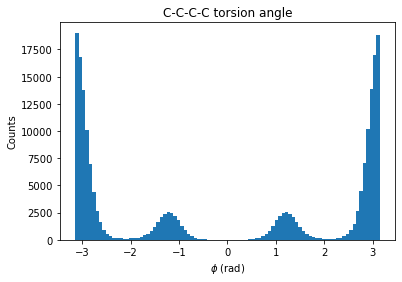

In [6]:
import numpy as np
import matplotlib.pyplot as plt

phicounts, binedges, otherstuff = plt.hist(phi, bins=90)
plt.title('C-C-C-C torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()

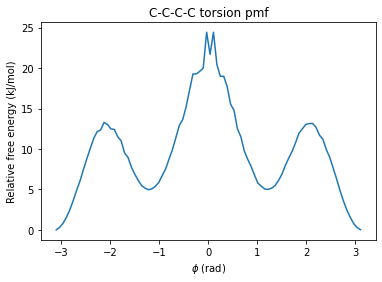

In [7]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('C-C-C-C torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

In [8]:
theta_indices = [0, 4, 7] # atoms for bend
theta = md.compute_angles(traj, [theta_indices])

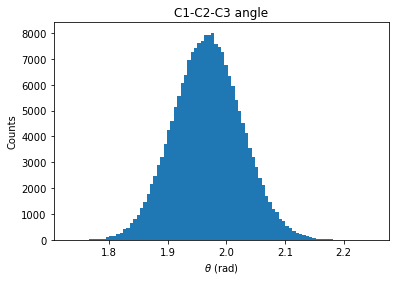

In [9]:
thetacounts, binedges, otherstuff = plt.hist(theta, bins=90)
plt.title('C1-C2-C3 angle')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Counts')
plt.show()

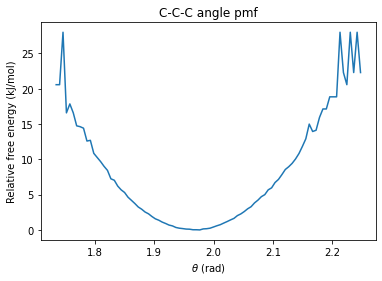

In [10]:
thetacounts[thetacounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(thetacounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('C-C-C angle pmf')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

In [11]:
bond_indices = [0, 1] # atoms to define bond length
bond_length = md.compute_distances(traj, [bond_indices])

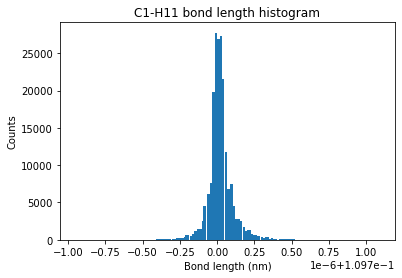

In [12]:
bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C1-H11 bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

In [13]:
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [15]:
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x7fa55a636710>

In [16]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


In [17]:
top.atom(2)

NBU1-H12

In [18]:
#Select All hydrogen Atoms
H_sel=top.select("type H")
print(H_sel)
#Confirm that we have selected what we think we have
for atom in H_sel:
    print(top.atom(atom))

[ 1  2  3  5  6  8  9 11 12 13]
NBU1-H11
NBU1-H12
NBU1-H13
NBU1-H21
NBU1-H22
NBU1-H31
NBU1-H32
NBU1-H41
NBU1-H42
NBU1-H43


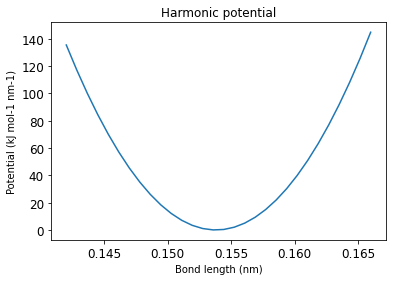

In [19]:
bondlengths=np.linspace(0.142,0.166,30)

#array bond length
def harmonic_bond_E(k,b,b0):
    return k/2*(b-b0)**2

Bond_E=harmonic_bond_E(1945727.27,bondlengths,0.15380)

plt.plot(bondlengths,Bond_E)

plt.title('Harmonic potential')
plt.xlabel('Bond length (nm)')
plt.ylabel('Potential (kJ mol-1 nm-1)')
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

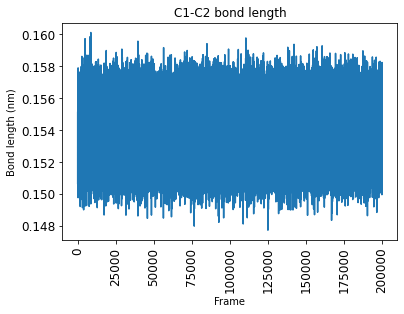

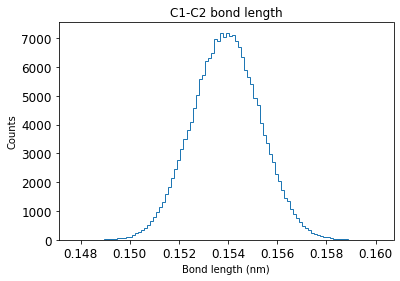

In [20]:
#Compute Some Distances and plot the time course - Bond 0-4
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])

plt.plot(C1C2bondlength)

plt.title('C1-C2 bond length')
plt.xlabel('Frame')
plt.ylabel('Bond length (nm)')
plt.xticks(rotation=90)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

plt.title('C1-C2 bond length')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.xticks(size=12)
plt.yticks(size=12)

plt.hist(C1C2bondlength,bins=100,histtype='step')
plt.show()

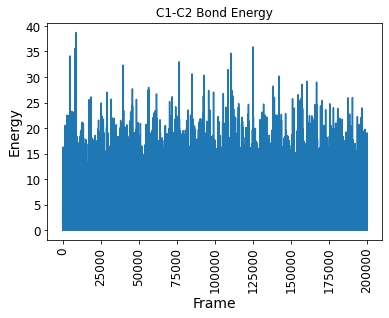

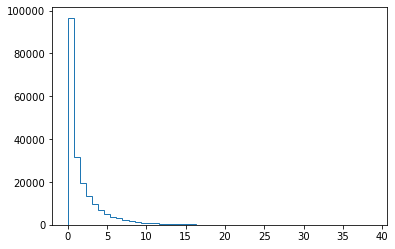

In [21]:
C1C2bond=C1C2bondlength[:,0]

C1C2_BondE=harmonic_bond_E(1945727.27,C1C2bond,0.15380)
plt.plot(C1C2_BondE)

plt.xlabel('Frame', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
plt.ylabel('Energy', size=14)
plt.title('C1-C2 Bond Energy')
plt.show()
plt.clf()

plt.hist(C1C2_BondE,histtype='step',bins=50)
plt.show()

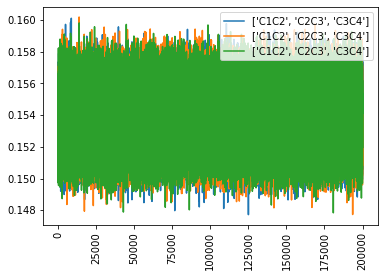

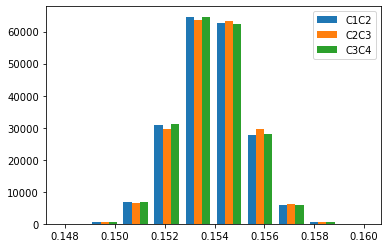

In [22]:
bond_indices = [[0, 4],[4, 7],[7, 10]]
CC_bondlengths = md.compute_distances(traj, bond_indices)

C1C2_bond=CC_bondlengths[:,0]
C2C3_bond=CC_bondlengths[:,1]
C3C4_bond=CC_bondlengths[:,2]

plt.plot(CC_bondlengths,label=['C1C2','C2C3','C3C4'])
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.clf()

plt.hist(CC_bondlengths,label=['C1C2','C2C3','C3C4'])
plt.legend()

In [23]:
ave=np.average(C1C2_bond)
var=np.var(C1C2_bond)
std=np.std(C1C2_bond)

print("Average:",ave,"Varience:",var,"Standard Deviation:",std)

Average: 0.153901 Varience: 1.8879479e-06 Standard Deviation: 0.0013740262


R2: -0.09770568073352653
Line Parameters: [0.50013667 0.07697459]


/usr/local/anaconda3/envs/omm/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


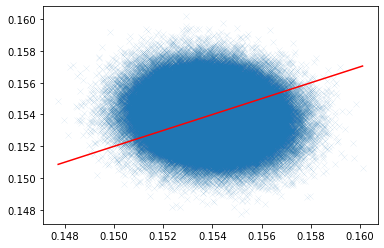

Line Parameters: [0.49998748 0.07695163]


/usr/local/anaconda3/envs/omm/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


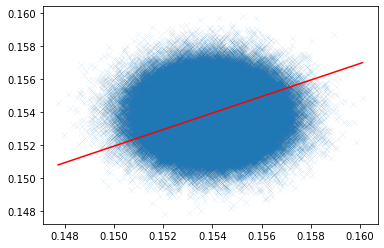

R2: 0.006188427300952072


<Figure size 432x288 with 0 Axes>

In [24]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

#plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',linewidth=0.05)
#######SOLUTION###########

plt.scatter(C1C2_bond,C2C3_bond,marker='x',linewidth=.05)

r2=np.corrcoef(C1C2_bond,C2C3_bond)[0,1]
print("R2:",r2)

line_fit=np.polyfit(C1C2_bond,C2C3_bond,1)
x = np.linspace(min(C1C2_bond), max(C1C2_bond),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

plt.scatter(C1C2_bond,C3C4_bond,marker='x',linewidth=.05)
x = np.linspace(min(C1C2_bond), max(C1C2_bond),20)
line_fit=np.polyfit(C1C2_bond,C3C4_bond,1)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r2=np.corrcoef(C1C2_bond,C3C4_bond)[0,1]

print("R2:",r2)

In [25]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])

bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])

In [26]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)
print("C1-C2 var:",C1C2var,"C2-C3 var:",C2C3var,"C3-C4 var:",C3C4var)
print("C1-C2 std:",C1C2std,"C2-C3 std:",C2C3std,"C3-C4 std:",C3C4std)

C1-C2 var: 1.8879479e-06 C2-C3 var: 1.9025352e-06 C3-C4 var: 1.8742921e-06
C1-C2 std: 0.0013740261497760763 C2-C3 std: 0.0013793241989431652 C3-C4 std: 0.0013690478948458528


a: 0.18688160588432629 x0: 0.15390264540309298 fit_sigma: -0.001387682183815719


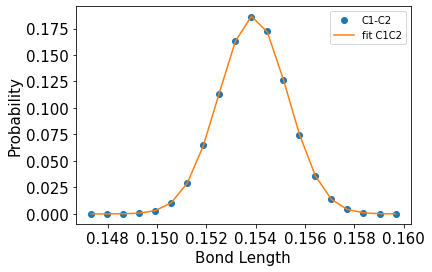

In [27]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

###Now we define a gaussian function that we'll fit to our probability densities

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers


def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 




C1C2_density,centers=histogram_bincenters(C1C2bond,0.147,0.160,20)

C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


a: 0.18688160588432629 x0: 0.15390264540309298 fit_sigma: -0.001387682183815719
a: 0.1864932546701239 x0: 0.15395091459821147 fit_sigma: -0.0013900741000347663
a: 0.1875839214835781 x0: 0.15390206631104086 fit_sigma: -0.001382413825309498


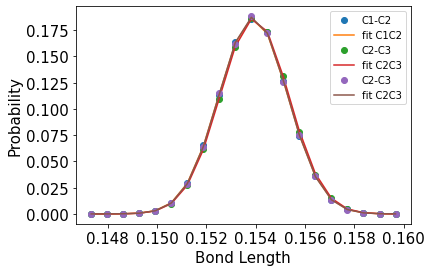

In [28]:
C1C2_density,centers=histogram_bincenters(C1C2bond,0.147,0.160,20)

C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')

counts, edges = np.histogram(C2C3_bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

C2C3_density,centers=histogram_bincenters(C2C3_bond,0.147,0.160,20)

C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')


counts, edges = np.histogram(C3C4_bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

C2C3_density,centers=histogram_bincenters(C3C4_bond,0.147,0.160,20)

C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()




(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

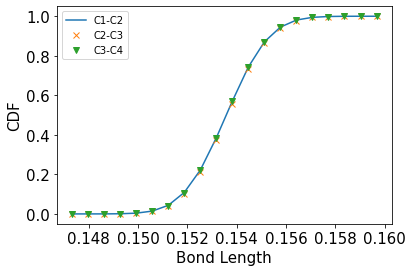

In [29]:
#Create CDF plot of C1C2 bond for the lols

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=np.cumsum(counts)/np.sum(counts)

###Now we define a gaussian function that we'll fit to our probability densities

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=np.cumsum(counts)/np.sum(counts)
    return density, centers

C1C2_density,centers=histogram_bincenters(C1C2bond,0.147,0.160,20)
plt.plot(centers, C1C2_density, '-', label='C1-C2')

C2C3_density,centers=histogram_bincenters(C2C3bondlength,0.147,0.160,20)
plt.plot(centers, C2C3_density, 'x', label='C2-C3')

C3C4_density,centers=histogram_bincenters(C3C4bondlength,0.147,0.160,20)
plt.plot(centers, C3C4_density, 'v', label='C3-C4')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('CDF', size=15)
plt.yticks(size=15)

a: 0.501579250266133 x0: 0.15425747561584063 fit_sigma: 0.0003210924949351431


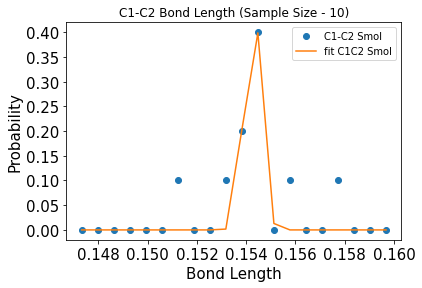

a: 0.23264624324939612 x0: 0.1537083335283236 fit_sigma: 0.0010665105050050904


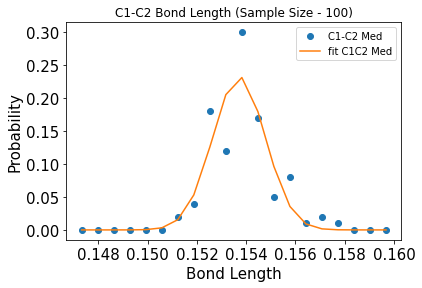

a: 0.19098360269738915 x0: 0.1539500086215501 fit_sigma: 0.0013456485815714699


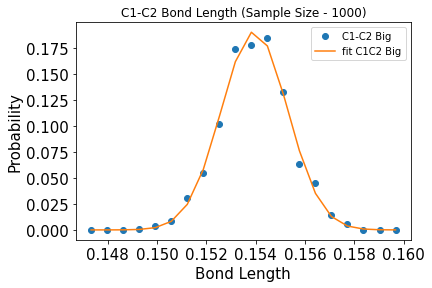

In [30]:
import random

#ADD CODE FOR Random Samples here#
#Draw 10,100,1000 random samples of a bond angle,

smol=random.choices(C1C2_bond,k=10)
med=random.choices(C1C2_bond,k=100)
big=random.choices(C1C2_bond,k=1000)

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers

counts, edges = np.histogram(smol, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

smol_density,centers=histogram_bincenters(smol,0.147,0.160,20)
smol_fit,smol_fit_params=fit_gauss(centers,smol_density)

plt.plot(centers, smol_density, 'o', label='C1-C2 Smol')
plt.plot(centers, smol_fit, '-', label='fit C1C2 Smol')

plt.title('C1-C2 Bond Length (Sample Size - 10)')
plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

counts, edges = np.histogram(med, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

med_density,centers=histogram_bincenters(med,0.147,0.160,20)
med_fit,med_fit_params=fit_gauss(centers,med_density)

plt.plot(centers, med_density, 'o', label='C1-C2 Med')
plt.plot(centers, med_fit, '-', label='fit C1C2 Med')

plt.title('C1-C2 Bond Length (Sample Size - 100)')
plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

counts, edges = np.histogram(big, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

big_density,centers=histogram_bincenters(big,0.147,0.160,20)
big_fit,big_fit_params=fit_gauss(centers,big_density)

plt.plot(centers, big_density, 'o', label='C1-C2 Big')
plt.plot(centers, big_fit, '-', label='fit C1C2 Big')

plt.title('C1-C2 Bond Length (Sample Size - 1000)')
plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


(200000, 2)


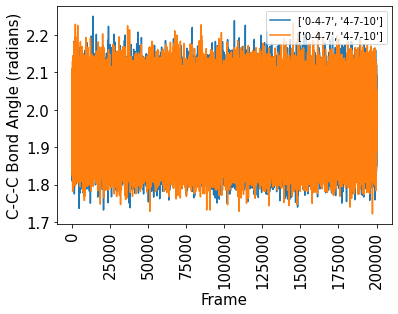

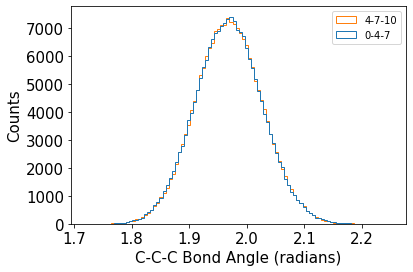

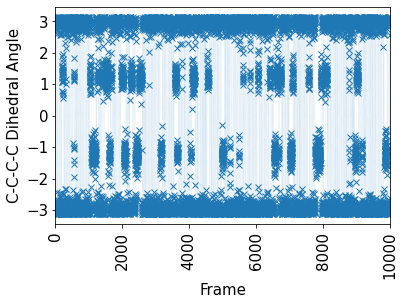

In [31]:
#Lets Compute Some Bond Angles 
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
#ang=np.degrees(angle_rad)
print(np.shape(ang))
plt.plot(ang,label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.xticks(rotation=90)
plt.ylabel('C-C-C Bond Angle (radians)', size=15)
plt.yticks(size=15)
plt.show()

plt.show()
plt.clf()
plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()
plt.clf()

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])

#plt.plot(CCCC_torsion)
plt.plot(CCCC_torsion,marker='x',linewidth=.01)
plt.xlim(0,10000)
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.xticks(rotation=90)
plt.ylabel('C-C-C-C Dihedral Angle', size=15)
plt.yticks(size=15)
plt.show()

Gauche Transitions: 994 Average Residence Time (ps): 15669.416498993965


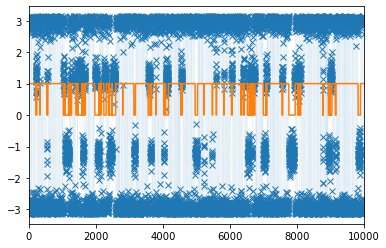

In [32]:
time_series=CCCC_torsion[:,0]
state_assign=np.zeros(len(time_series))
frame_set=np.where((CCCC_torsion[:,0]<-2) | (CCCC_torsion[:,0]>2))
state_assign[frame_set]=1
plt.plot(time_series,marker='x',linewidth=.01)
plt.plot(state_assign)
plt.xlim(0,10000)

gauche=0
n=0
res_time=[]

for i in range(1,len(state_assign)):
    if state_assign[i]==1:
     if gauche==0:
      gauche=1
     n+=1
    if state_assign[i]==0:
     gauche=0   
     if state_assign[i-1]!=0:
      res_time.append(n)
      n=0
#Traj=1000000 ps / 10000 frames
#100ps/frame
print("Gauche Transitions:",len(res_time),"Average Residence Time (ps):",np.average(res_time)*100)

r2: -0.0040903460669499975
[-8.87870263e-05  1.96820114e+00]


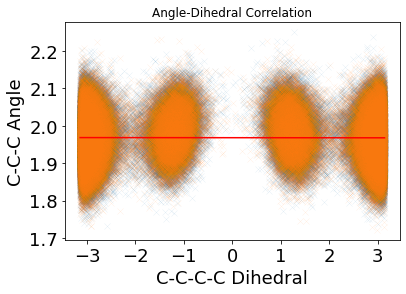

Angle Correlation r^2: 0.0622544053541635


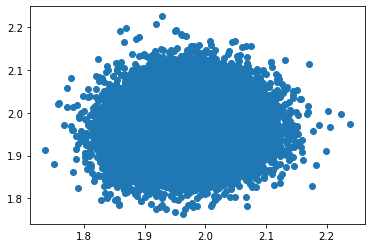

In [33]:
#Are the bond angle and dihedral correlated?

ang1=ang[:,0]
ang2=ang[:,1]

plt.scatter(CCCC_torsion,ang1,marker='x',linewidth=0.04)
plt.scatter(CCCC_torsion,ang2,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],ang1,1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('C-C-C Angle', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()


plt.scatter(ang1[1:-1:10],ang2[1:-1:10])
r=np.corrcoef(ang1, ang2)
print("Angle Correlation r^2:",r[0,1])



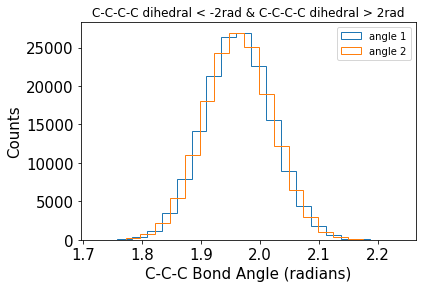

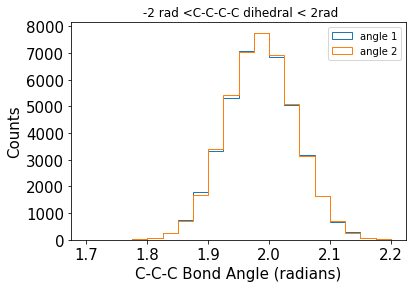

In [34]:
#Homework problem 3##
#One approach os to take a slice of the dihedral space, and plot the histogram/pdf for bond angles 

#Slice the dihedral angle to get all frames in a given interval

frame_set=np.where((CCCC_torsion[:,0]<-2) | (CCCC_torsion[:,0]>2))

plt.hist(ang1[frame_set],histtype='step',label='angle 1',bins=20)
plt.hist(ang2[frame_set],histtype='step',label='angle 2',bins=20)
plt.legend()
plt.title('C-C-C-C dihedral < -2rad & C-C-C-C dihedral > 2rad')
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)

plt.show()
plt.clf()

frame_set=np.where((CCCC_torsion[:,0]>-2) & (CCCC_torsion[:,0]<2))
plt.title(' -2 rad <C-C-C-C dihedral < 2rad')

plt.hist(ang1[frame_set],histtype='step',label='angle 1',bins=20,range=[1.7,2.2])
plt.hist(ang2[frame_set],histtype='step',label='angle 2',bins=20,range=[1.7,2.2])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()

[0.000000e+00 1.000005e-01 2.000010e-01 ... 1.999980e+04 1.999990e+04
 2.000000e+04]


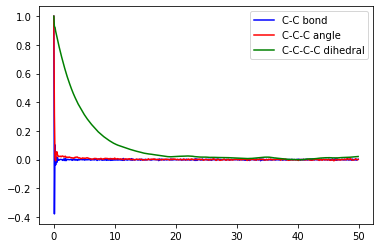

In [50]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

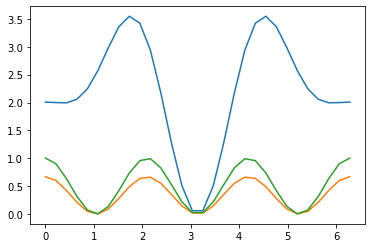

In [51]:
#Plot The Torsion Force Field Terms

import math

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)

In [52]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [51]:
#tally all the CCCH torsions
CCCH_index=[[7,4,0,1],[7,4,0,2],[7,4,0,3],[10,7,4,5],[10,7,4,6],[0,4,7,8],[0,4,7,9],[4,7,10,11],[4,7,10,12],
            [4,7,10,13]]
CCCH_torsion=md.compute_dihedrals(traj, CCCH_index)

In [52]:
#tally all the HCCH torsions
HCCH_index=[[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9],[9,7,4,5],[9,7,4,6],[8,7,4,5],
            [8,7,4,6],[5,4,0,1],[5,4,0,2],[5,4,0,3],[6,4,0,1],[6,4,0,2],[6,4,0,3]]
HCCH_torsion16=md.compute_dihedrals(traj, HCCH_index)


r2: 0.636752722825558
[ 0.63387946 -0.00091186]


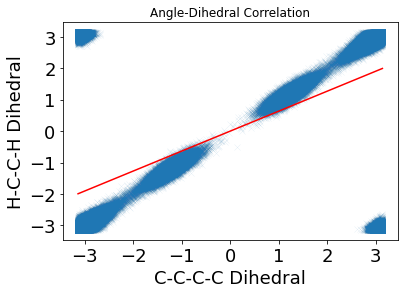

In [53]:
#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

HCCH_index=[8,7,4,5]
HCCH_torsion=md.compute_dihedrals(traj, [HCCH_index])

#Are the bond angle and dihedral correlated?

plt.scatter(CCCC_torsion,HCCH_torsion,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsion[:,0])
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsion[:,0],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('H-C-C-H Dihedral', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()

In [57]:
CCCC_index=[10,7,4,0]
HCCH_indices=[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])

In [60]:
CCCH_torsions[:,1]

array([ 2.9221206,  2.6720808,  2.540932 , ..., -2.8480763,  3.1142209,
        2.9845588], dtype=float32)

r2: 0.015628729330593366
[0.01103958 0.07844603]


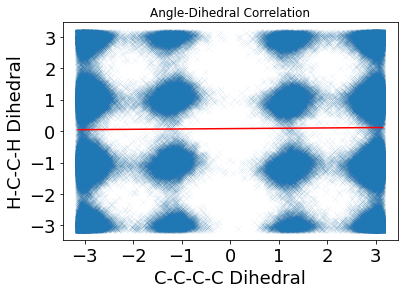

In [46]:
HCCH_index=[1,0,4,5]
HCCH_torsion2=md.compute_dihedrals(traj, [HCCH_index])

#Are the bond angle and dihedral correlated?

plt.scatter(CCCC_torsion,HCCH_torsion2,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsion2[:,0])
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsion2[:,0],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('H-C-C-H Dihedral', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()

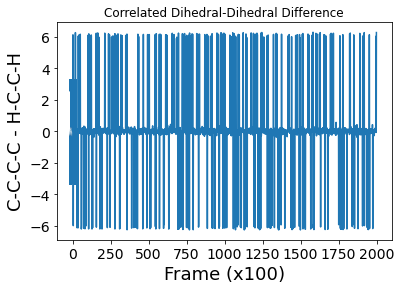

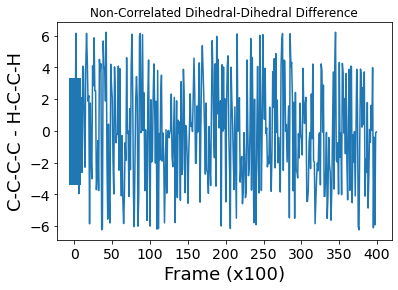

In [87]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT

plt.scatter(CCCC_torsion,HCCH_torsion,marker='x',linewidth=0.04)
diff=CCCC_torsion[:,0]-HCCH_torsion[:,0]
plt.plot(diff[::100])

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Frame (x100)', size=18)
plt.ylabel('C-C-C-C - H-C-C-H', size=18)
plt.title('Correlated Dihedral-Dihedral Difference')

plt.show()

plt.scatter(CCCC_torsion,HCCH_torsion2,marker='x',linewidth=0.04)
diff=CCCC_torsion[:,0]-HCCH_torsion2[:,0]
plt.plot(diff[::500])

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Frame (x100)', size=18)
plt.ylabel('C-C-C-C - H-C-C-H', size=18)
plt.title('Non-Correlated Dihedral-Dihedral Difference')

plt.show()

In [88]:
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


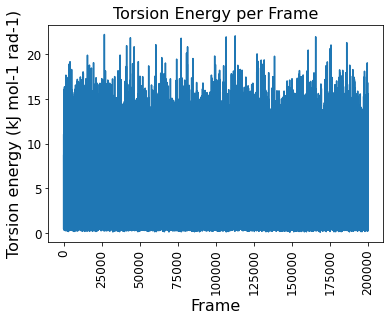

In [102]:
#COMPUTE THE TOTAL TORSION FORCE FIELD ENERGY PER FRAME

totalTorsion=(CCCC_torsionE(CCCC_torsion)+
            CCCH_torsionE(CCCH_torsion1)+CCCH_torsionE(CCCH_torsion2)+CCCH_torsionE(CCCH_torsion3)+CCCH_torsionE(CCCH_torsion4)+
            CCCH_torsionE(CCCH_torsion5)+CCCH_torsionE(CCCH_torsion6)+CCCH_torsionE(CCCH_torsion7)+CCCH_torsionE(CCCH_torsion8)+
            CCCH_torsionE(CCCH_torsion9)+CCCH_torsionE(CCCH_torsion10)+
            HCCH_torsionE(HCCH_torsion1)+HCCH_torsionE(HCCH_torsion2)+HCCH_torsionE(HCCH_torsion3)+HCCH_torsionE(HCCH_torsion4)+
            HCCH_torsionE(HCCH_torsion5)+HCCH_torsionE(HCCH_torsion6)+HCCH_torsionE(HCCH_torsion7)+HCCH_torsionE(HCCH_torsion8)+
            HCCH_torsionE(HCCH_torsion9)+HCCH_torsionE(HCCH_torsion10)+HCCH_torsionE(HCCH_torsion11)+HCCH_torsionE(HCCH_torsion12)+
            HCCH_torsionE(HCCH_torsion13)+HCCH_torsionE(HCCH_torsion14)+HCCH_torsionE(HCCH_torsion15)+HCCH_torsionE(HCCH_torsion16))

plt.plot(totalTorsion)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Frame', size=16)
plt.ylabel('Torsion energy (kJ mol-1 rad-1)', size=16)
plt.xticks(rotation=90)
plt.title('Torsion Energy per Frame', size=16)
plt.show()

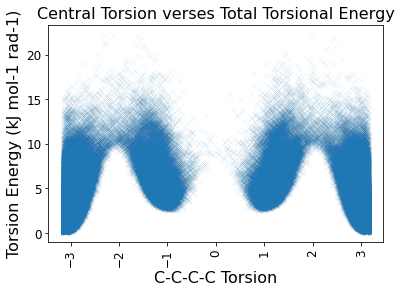

In [106]:
#plot the total torsion energy as a function of the C-C-C-C dihedral angle

plt.scatter(CCCC_torsion,totalTorsion,marker='x',linewidth=0.04)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('C-C-C-C Torsion', size=16)
plt.ylabel('Torsion Energy (kJ mol-1 rad-1)', size=16)
plt.xticks(rotation=90)
plt.title('Central Torsion verses Total Torsional Energy', size=16)
plt.show()
